In [1]:
from visual_behavior_glm.glm import GLM
import visual_behavior_glm.GLM_fit_tools as gft
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_visualization_tools as gvt

import visual_behavior.utilities as vbu
import visual_behavior.plotting as vbp
import visual_behavior.data_access.loading as loading
import visual_behavior.visualization.utils as vis_utils
import visual_behavior.database as db

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib inline
%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


In [11]:
# oeid = 994279627
oeid = 792813858
version = '7_L2_optimize_by_session'
glm = GLM(oeid, version, use_previous_fit=True, log_results=False, log_weights=False)

importing GLM_fit_tools from /allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/v_7_L2_optimize_by_session/frozen_model_files/GLM_fit_tools.py
loading previous fit...


/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'behavior_monitoring', 'eye_tracking'}. Consider updating the sync file line labels.
  self._check_line_labels()
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'behavior_monitoring', 'eye_tracking'}. Consider updating the sync file line labels.
  self._check_line_labels()


    Adding kernel: intercept
    Adding kernel: time
    Adding kernel: pre_licks
    Adding kernel: post_licks
    Adding kernel: pre_lick_bouts
    Adding kernel: post_lick_bouts
    Adding kernel: rewards
    Adding kernel: change
    Adding kernel: hits
    Adding kernel: misses
    Adding kernel: false_alarms
    Adding kernel: correct_rejects
Error encountered while adding kernel for correct_rejects. Attemping to continue without this kernel. 
Less than minimum number of events: 2 correct_reject
    Adding kernel: omissions
    Adding kernel: image_expectation
    Adding kernel: running
                 : Normalized by max value: 100
    Adding kernel: pupil


/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'behavior_monitoring', 'eye_tracking'}. Consider updating the sync file line labels.
  self._check_line_labels()


                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_0
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_1
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_2
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_3
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_4
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: image0
    Adding kernel: image1
    Adding kernel: image2
    Adding kernel: image3
    Adding kernel: image4
    Adding kernel: image5
    Adding kernel: image6
    Adding kernel: image7
    Adding kernel: model_bias
                 : Mean Centering
                 : Standardized to unit variance
 

In [12]:
glm.results.sort_values(by='Full__avg_cv_var_test',ascending=False)

,Full__avg_cv_var_train,Full__avg_cv_var_test,Full__avg_cv_var_test_full_comparison,Full__avg_cv_adjvar_train,Full__avg_cv_adjvar_test,Full__avg_cv_adjvar_test_full_comparison,Full__absolute_change_from_full,Full__adj_dropout,Full__dropout,intercept__avg_cv_var_train,...,single-cognitive__adj_dropout,single-beh_model__avg_cv_var_train,single-beh_model__avg_cv_var_test,single-beh_model__avg_cv_var_test_full_comparison,single-beh_model__avg_cv_adjvar_train,single-beh_model__avg_cv_adjvar_test,single-beh_model__avg_cv_adjvar_test_full_comparison,single-beh_model__absolute_change_from_full,single-beh_model__dropout,single-beh_model__adj_dropout
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
962616900,0.768047,0.750549,0.750549,0.768047,0.750549,0.750549,0.0,-0.0,-0.0,0.767533,...,0.000000,0.020363,0.0,0.750549,0.020363,0.0,0.750580,-0.750549,0.0,0.0
962579279,0.570450,0.547509,0.547509,0.570450,0.547509,0.547509,0.0,-0.0,-0.0,0.570231,...,-0.036220,0.002039,0.0,0.547509,0.002039,0.0,0.547531,-0.547509,0.0,0.0
962589092,0.559038,0.528974,0.528974,0.559038,0.528974,0.528974,0.0,-0.0,-0.0,0.559010,...,0.000000,0.016842,0.0,0.528974,0.016860,0.0,0.529193,-0.528974,0.0,0.0
962620234,0.543091,0.525990,0.525990,0.543091,0.525990,0.525990,0.0,-0.0,-0.0,0.543103,...,-0.076539,0.003611,0.0,0.525990,0.003611,0.0,0.526002,-0.525990,0.0,0.0
962610958,0.588128,0.510383,0.510383,0.588128,0.510383,0.510383,0.0,-0.0,-0.0,0.587963,...,0.000000,0.021965,0.0,0.510383,0.021965,0.0,0.510480,-0.510383,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962626804,0.028740,0.008179,0.008179,0.028740,0.008179,0.008179,0.0,-0.0,-0.0,0.028740,...,0.000000,0.000038,0.0,0.008179,0.000038,0.0,0.008181,-0.008179,0.0,0.0
962626284,0.027091,0.005985,0.005985,0.027091,0.005985,0.005985,0.0,-0.0,-0.0,0.027088,...,0.000000,0.000050,0.0,0.005985,0.000050,0.0,0.005986,-0.005985,0.0,0.0
962605101,0.030527,0.000000,0.000000,0.030527,0.000000,0.000000,0.0,0.0,0.0,0.030484,...,0.000000,0.002492,0.0,0.000000,0.002492,0.0,0.000000,0.000000,0.0,0.0


/home/dougo/Code/visual_behavior_analysis/visual_behavior/utilities.py:310: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  timestamp_file = h5py.File(filepath.replace('.avi', '.h5'))
/home/dougo/Code/visual_behavior_analysis/visual_behavior/utilities.py:310: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  timestamp_file = h5py.File(filepath.replace('.avi', '.h5'))


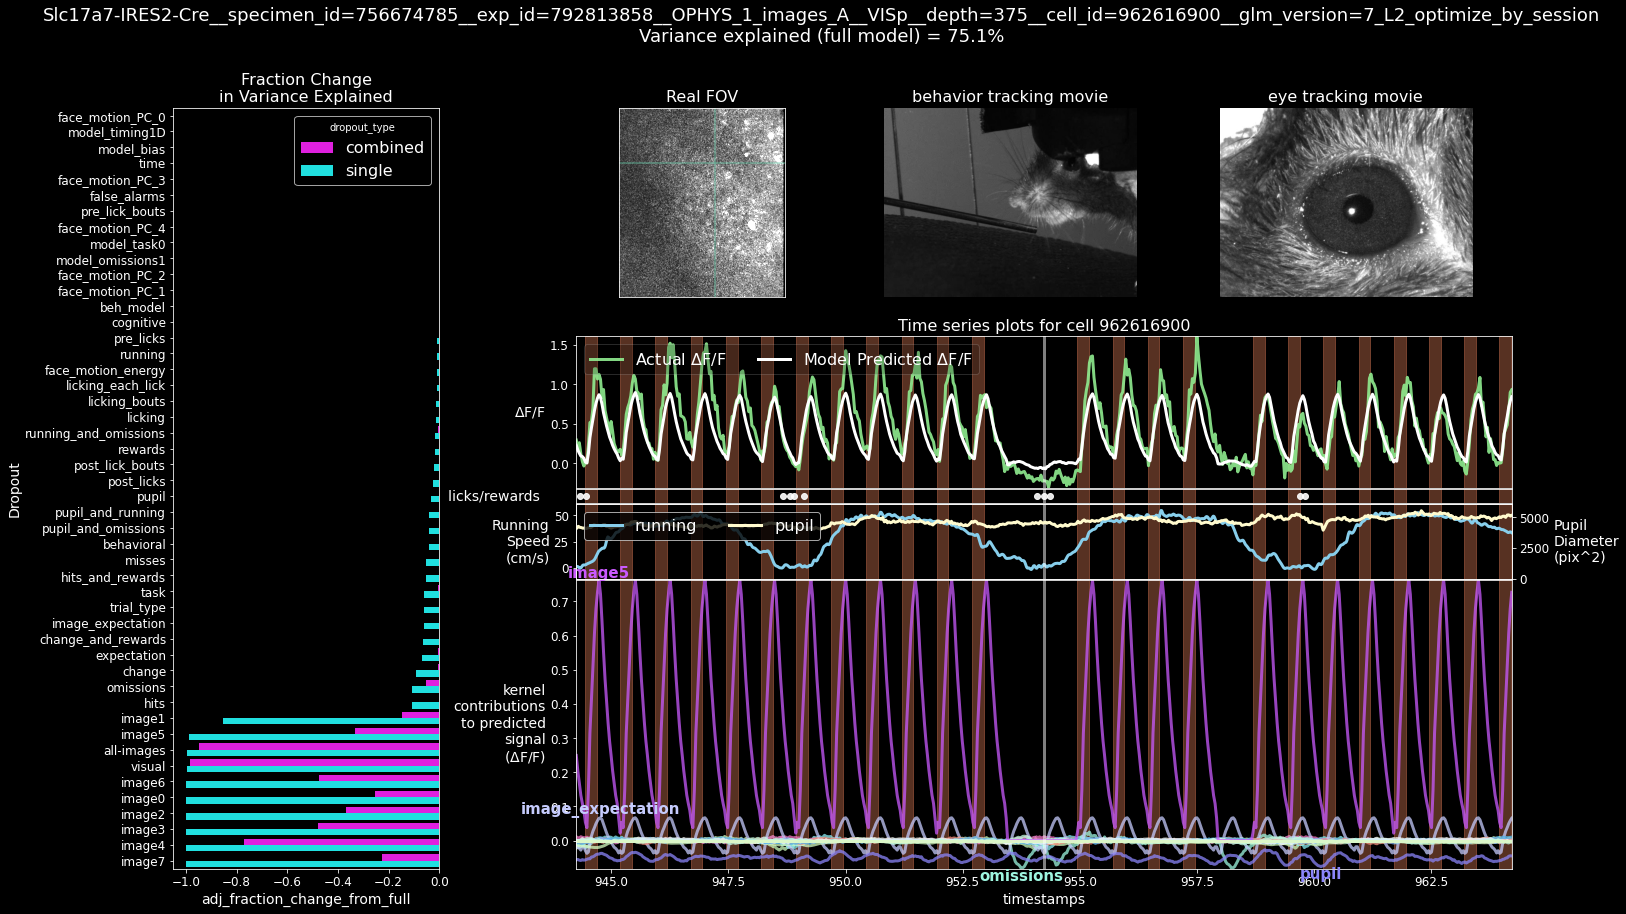

In [22]:
self = gvt.GLM_Movie(glm, cell_specimen_id=962616900, start_frame=20000, end_frame=20500, frame_interval=1, destination_folder='/home/dougo/OneDrive/glm_movies',fps=10)
self.make_cell_movie_frame(self.ax, self.glm, F_index=20000, cell_specimen_id=self.cell_specimen_id)

In [17]:
%debug

> /home/dougo/Code/visual_behavior_glm/visual_behavior_glm/GLM_visualization_tools.py(935)make_cell_movie_frame()
    933             this_cell.query(qs)['dff'].max(),
    934         )
--> 935         assert False
    936 
    937         ax['cell_response'].legend(

ipdb> this_cell.query(qs)['dff']
4340179   -0.218344
Name: dff, dtype: float64
ipdb> self.initial_time
954.23703
ipdb> self.final_time
954.23703
ipdb> q


In [10]:
self.make_movie()

501it [15:56,  1.91s/it]                         


In [323]:
np.percentile(glm.session.dataset.eye_tracking['pupil_area'].fillna(0), 95)

13933.915884948556

In [169]:
self.palette_df

,kernel_name,kernel_color
0,intercept,"(0.009968179232284546, 0.4318454396151756, 0.6..."
1,time,"(0.48426790118158475, 0.33309050158442255, 0.9..."
2,pre_licks,"(0.4137999807436036, 0.9688847700993637, 0.224..."
3,post_licks,"(0.1397517039596199, 0.4541944469516509, 0.476..."
4,pre_lick_bouts,"(0.81719332260592, 0.10155867016996978, 0.5612..."
5,post_lick_bouts,"(0.481920893916228, 0.11580034545260803, 0.343..."
6,rewards,"(0.5612501698841906, 0.4440873501747524, 0.085..."
7,change,"(0.33029314839843393, 0.4083132647503653, 0.08..."
8,hits,"(0.6789280088196009, 0.22660815960415992, 0.02..."
9,misses,"(0.15134137035566975, 0.6935368245589338, 0.50..."


In [189]:
self.kernel_df['kernel_outputs'].min()

-0.3084141316363173

In [146]:
%%time
def get_max_locs_df(df_in):
    df_in = df_in.copy()
    df_in['kernel_outputs_abs'] = df_in['kernel_outputs'].abs()
    max_df = df_in.groupby('kernel_name')[['kernel_outputs','kernel_outputs_abs']].max().sort_values(by='kernel_outputs', ascending=False)
    max_locs = []
    for kernel_name,row in max_df.iterrows():
        kernel_subset = df_in.query('kernel_name == @kernel_name')
        m = subset['kernel_outputs_abs'].abs().max()
        max_locs.append({
            'kernel_name': kernel_name,
            'abs_max_value': kernel_subset['kernel_outputs_abs'].abs().max(),
            'abs_max_sign': np.sign(kernel_subset.loc[kernel_subset['kernel_outputs_abs'].idxmax()]['kernel_outputs']),
            'idx': kernel_subset['kernel_outputs_abs'].idxmax(),
            'time': kernel_subset.loc[kernel_subset['kernel_outputs_abs'].idxmax()]['timestamps'],
            'percentile':stats.percentileofscore(df_in['kernel_outputs_abs'], kernel_subset['kernel_outputs_abs'].abs().max(), kind='strict')
        })
    return pd.DataFrame(max_locs)

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 26 µs


In [147]:
kernel_df = self.kernel_df
t0,t1 = t_span
kernels_to_exclude_from_plot = ['intercept','time','model_task0','model_timing1D','model_bias','model_omissions1']
data_to_plot = kernel_df.query('timestamps >= @t0 and timestamps <= @t1 and kernel_name not in @kernels_to_exclude_from_plot')

In [148]:
%%time
max_locs = get_max_locs_df(data_to_plot)
max_locs

CPU times: user 94.9 ms, sys: 193 µs, total: 95.1 ms
Wall time: 76.3 ms


,kernel_name,abs_max_value,abs_max_sign,idx,time,percentile
0,post_licks,0.565341,1.0,14923,1708.65092,99.982027
1,pupil,0.218670,1.0,14891,1705.66747,98.382459
2,rewards,0.091857,1.0,14927,1709.02385,89.863408
3,face_motion_PC_4,0.081995,1.0,14940,1710.23588,89.521927
4,face_motion_PC_1,0.070491,1.0,14936,1709.86294,88.964774
5,hits,0.069007,1.0,14924,1708.74415,88.892883
6,change,0.068273,1.0,14927,1709.02385,88.820992
7,face_motion_PC_3,0.060815,1.0,14923,1708.65092,88.407620
8,face_motion_PC_2,0.052254,-1.0,14886,1705.20131,87.778577
9,face_motion_PC_0,0.099046,-1.0,14945,1710.70204,90.061107


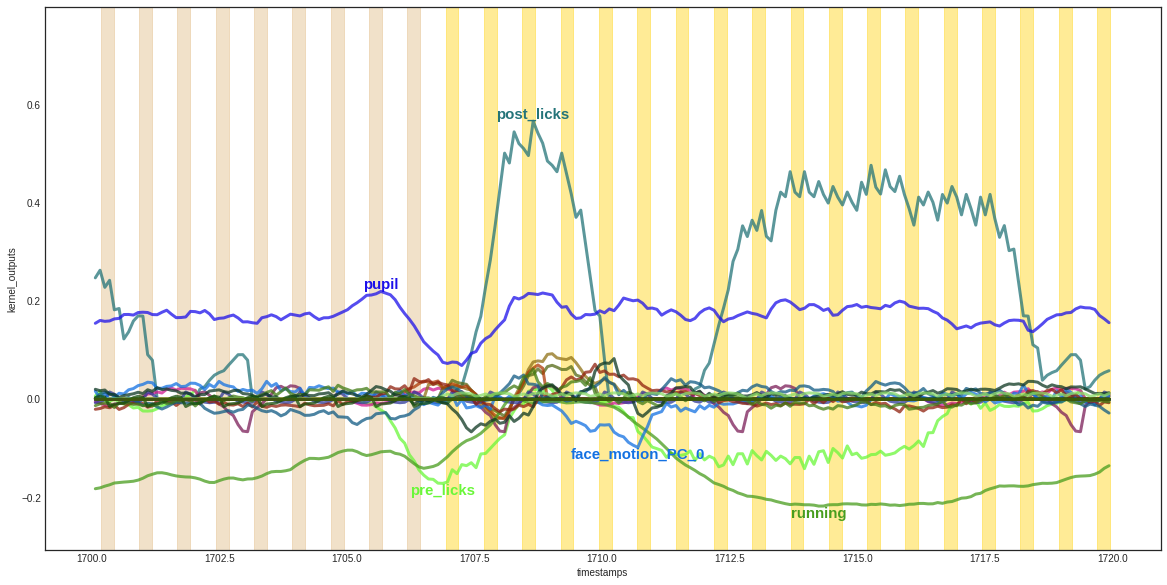

In [199]:
fig,ax=plt.subplots(figsize=(20,10))
t_span=(1700,1720)
gvt.plot_kernels(self.kernel_df, ax, self.palette_df, t_span, legend=False)
gvt.plot_stimuli(glm.session, ax, t_span=t_span)

# percentile_threshold = 90
# for idx,row in max_locs.iterrows():
#     kernel_name = row['kernel_name']
#     if row['percentile'] > percentile_threshold:
#         va = 'top' if row['abs_max_sign'] < 0 else 'bottom'
#         ax.text(
#             row['time'], 
#             row['abs_max_sign']*row['abs_max_value'],
#             row['kernel_name'],
#             ha='center',
#             va=va,
#             fontweight='bold',
#             color=self.palette_df.query('kernel_name == @kernel_name')['kernel_color'].iloc[0],
#             fontsize=15
#         )

In [191]:
ax.set_yl

AttributeError: 'AxesSubplot' object has no attribute 'set_yl'

In [157]:
self.kernel_df['kernel_name'].unique()

array(['intercept', 'time', 'pre_licks', 'post_licks', 'pre_lick_bouts',
       'post_lick_bouts', 'rewards', 'change', 'hits', 'misses',
       'correct_rejects', 'omissions', 'image_expectation', 'running',
       'pupil', 'face_motion_PC_0', 'face_motion_PC_1',
       'face_motion_PC_2', 'face_motion_PC_3', 'face_motion_PC_4',
       'image0', 'image1', 'image2', 'image3', 'image4', 'image5',
       'image6', 'image7'], dtype=object)

In [68]:
data_to_plot

,timestamps,timestamp_index,kernel_outputs,kernel_name
14831,1700.07352,14831,0.005601,pre_licks
14832,1700.16676,14832,0.015707,pre_licks
14833,1700.25999,14833,-0.003559,pre_licks
14834,1700.35322,14834,-0.004849,pre_licks
14835,1700.44645,14835,-0.000861,pre_licks
...,...,...,...,...
15040,1719.55915,15040,0.000000,image7
15041,1719.65238,15041,0.000000,image7
15042,1719.74561,15042,0.000000,image7
15043,1719.83884,15043,0.000000,image7


In [69]:
kernel_names = [k for k in data_to_plot['kernel_name'].unique() if 'timestamp' not in k]
for kernel_name in kernel_names:
    data = data_to_plot

In [106]:
from scipy import stats

In [118]:
stats.percentileofscore(data_to_plot['kernel_outputs_abs'], 0.05, kind='strict')

87.70668583752695

In [112]:
stats.percentileofscore?

In [143]:
self.kernel_df

,timestamps,timestamp_index,kernel_outputs,kernel_name
0,317.35506,0,-0.00698,intercept
1,317.44829,1,-0.00698,intercept
2,317.54152,2,-0.00698,intercept
3,317.63475,3,-0.00698,intercept
4,317.72798,4,-0.00698,intercept
...,...,...,...,...
38645,3920.33302,38645,0.00000,image7
38646,3920.42625,38646,0.00000,image7
38647,3920.51949,38647,0.00000,image7
38648,3920.61272,38648,0.00000,image7


In [160]:
palette_df = pd.DataFrame({
    'kernel_name':self.kernel_df['kernel_name'].unique(),
    'kernel_color':vbp.generate_random_colors(
        len(self.kernel_df['kernel_name'].unique()), 
        lightness_range=(0.1,.65), 
        saturation_range=(0.5,1), 
        random_seed=3, 
        order_colors=False
    )
})
palette_df

,kernel_name,kernel_color
0,intercept,"(0.009968179232284546, 0.4318454396151756, 0.6..."
1,time,"(0.48426790118158475, 0.33309050158442255, 0.9..."
2,pre_licks,"(0.4137999807436036, 0.9688847700993637, 0.224..."
3,post_licks,"(0.1397517039596199, 0.4541944469516509, 0.476..."
4,pre_lick_bouts,"(0.81719332260592, 0.10155867016996978, 0.5612..."
5,post_lick_bouts,"(0.481920893916228, 0.11580034545260803, 0.343..."
6,rewards,"(0.5612501698841906, 0.4440873501747524, 0.085..."
7,change,"(0.33029314839843393, 0.4083132647503653, 0.08..."
8,hits,"(0.6789280088196009, 0.22660815960415992, 0.02..."
9,misses,"(0.15134137035566975, 0.6935368245589338, 0.50..."


In [166]:
kernels_to_exclude_from_plot = ['intercept','time','model_task0','model_timing1D','model_bias','model_omissions1']
kernels_to_include_in_plot = [k for k in self.kernel_df['kernel_name'].unique() if k not in kernels_to_exclude_from_plot]
palette_df.query('kernel_name in @kernels_to_include_in_plot')['kernel_color'].to_list()

[(0.4137999807436036, 0.9688847700993637, 0.22423274929287418),
 (0.1397517039596199, 0.4541944469516509, 0.4760417415021583),
 (0.81719332260592, 0.10155867016996978, 0.5612238848757256),
 (0.481920893916228, 0.11580034545260803, 0.3436157324075531),
 (0.5612501698841906, 0.4440873501747524, 0.08592173812968296),
 (0.33029314839843393, 0.4083132647503653, 0.08784587132580213),
 (0.6789280088196009, 0.22660815960415992, 0.024527030435674946),
 (0.15134137035566975, 0.6935368245589338, 0.5009810223217017),
 (0.4368155922682187, 0.1349005125505388, 0.06895966501774281),
 (0.08504345984556477, 0.34090791921992153, 0.274638857000833),
 (0.1746674607160097, 0.21841481459414322, 0.5907711050831765),
 (0.2807634335013688, 0.6152312483394298, 0.1167128372473154),
 (0.11111150897863149, 0.061949374049525385, 0.9165059099477129),
 (0.07461241371998617, 0.4434636590760575, 0.8855898003213547),
 (0.5602710353088911, 0.12401350527899319, 0.05068910125492998),
 (0.061286300460343224, 0.3531959272063

In [162]:
kernels_to_include_in_plot

['pre_licks',
 'post_licks',
 'pre_lick_bouts',
 'post_lick_bouts',
 'rewards',
 'change',
 'hits',
 'misses',
 'correct_rejects',
 'omissions',
 'image_expectation',
 'running',
 'pupil',
 'face_motion_PC_0',
 'face_motion_PC_1',
 'face_motion_PC_2',
 'face_motion_PC_3',
 'face_motion_PC_4',
 'image0',
 'image1',
 'image2',
 'image3',
 'image4',
 'image5',
 'image6',
 'image7']

In [200]:
glm.ophys_session_id

994212056

In [201]:
db.get_well_known_files(glm.ophys_session_id)

,id,size,content_type,filename,created_at,updated_at,storage_directory,well_known_file_type_id,file_source_id,published_at,workflow_state,attachable_id,attachable_type,id,created_at,updated_at
name,,,,,,,,,,,,,,,,
EyeDlcScreenMapping,1000887222,25128016,application/x-hdf; charset=binary,994212056_eyetracking_dlc_to_screen_mapping.h5,2020-01-18 13:17:41.528342,2020-01-18 13:17:41.528342,/allen/programs/braintv/production/visualbehav...,916857994,None,None,None,994212056,OphysSession,916857994,2019-08-03 16:26:11.202016,2019-08-03 16:26:11.202016
EyeTracking Ellipses,1000886747,19672792,application/x-hdf; charset=binary,994212056_ellipse.h5,2020-01-18 13:12:34.780929,2020-01-18 13:12:34.780929,/allen/programs/braintv/production/visualbehav...,914623492,None,None,None,994212056,OphysSession,914623492,2019-07-31 13:22:05.683874,2019-07-31 13:22:05.683874
EyeDlcOutputFile,1000882286,119135726,application/x-hdf; charset=binary,994212056_video-1DeepCut_resnet50_universal_ey...,2020-01-18 12:23:46.723204,2020-01-18 12:23:46.723204,/allen/programs/braintv/production/visualbehav...,990460508,None,None,None,994212056,OphysSession,990460508,2019-11-26 16:47:20.006823,2019-11-26 16:47:20.006823
RawBehaviorTrackingVideo,994279102,1617614094,video/x-msvideo; charset=binary,994212056_video-0.avi,2019-12-14 09:06:16.525153,2019-12-14 09:06:16.525153,/allen/programs/braintv/production/visualbehav...,695808672,None,None,None,994212056,OphysSession,695808672,2018-05-09 17:38:24.006153,2018-05-09 17:38:24.006153
RawEyeTrackingVideo,994279101,5527879180,video/x-msvideo; charset=binary,994212056_video-1.avi,2019-12-14 09:06:16.483349,2019-12-14 09:06:16.483349,/allen/programs/braintv/production/visualbehav...,695808172,None,None,None,994212056,OphysSession,695808172,2018-05-09 17:38:12.733419,2018-05-09 17:38:12.733419
OphysRigSync,994279100,11893373,application/x-hdf; charset=binary,994212056.h5,2019-12-14 09:06:16.438501,2019-12-14 09:06:16.438501,/allen/programs/braintv/production/visualbehav...,610487713,None,None,None,994212056,OphysSession,610487713,2017-08-18 02:02:26.580050,2017-08-18 02:02:26.580050
StimulusPickle,994279099,30169728,text/plain; charset=us-ascii,994212056.pkl,2019-12-14 09:06:16.390789,2019-12-14 09:06:16.390789,/allen/programs/braintv/production/visualbehav...,610487715,None,None,None,994212056,OphysSession,610487715,2017-08-18 02:02:27.885973,2017-08-18 02:02:27.885973
OphysPlatformJson,994279088,10639,text/plain; charset=us-ascii,994212056_platform.json,2019-12-14 09:06:15.934350,2019-12-14 09:06:15.934350,/allen/programs/braintv/production/visualbehav...,746251277,None,None,None,994212056,OphysSession,746251277,2018-09-07 02:13:00.160665,2018-09-07 02:13:00.160665


In [249]:
%%time
frame = 128387
mean_frame = np.mean(self.real_2p_movie[frame-1000:frame+1000,:,:], axis=0)

dff = (self.real_2p_movie[frame,:,:]-mean_frame)/mean_frame
dff[np.where(pd.isnull(dff))] = 0
dff

fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(self.real_2p_movie[frame,:,:])

ax[1].imshow(dff,clim=[-1,1])

ValueError: Index (128387) out of range (0-48305)

In [247]:
cell_specimen_id=1022738497
glm.df_full.query('cell_specimen_id == @cell_specimen_id and dff>1.8')['dff']

128387     1.809695
1131323    1.837492
Name: dff, dtype: float64

In [250]:
np.shape(self.real_2p_movie)

(48306, 512, 512)

In [ ]:
behavior_movie_path = 
behavior_movie = 

In [251]:
def get_movie_filepath(session_id, session_type='OphysSession', movie_type='RawBehaviorTrackingVideo'):
    well_known_files = db.get_well_known_files(session_id, session_type)
    behavior_video_path = ''.join(well_known_files.loc[movie_type][[
                                  'storage_directory', 'filename']].tolist())
    return behavior_video_path

In [263]:
def get_sync_data(session_id, session_type='OphysSession'):
    sync_key_map = {
        'OphysSession': 'OphysRigSync',
        'EcephysSession': 'EcephysRigSync',
    }
    well_known_files = db.get_well_known_files(session_id, session_type)
    sync_path = ''.join(well_known_files.loc[sync_key_map[session_type]][[
                        'storage_directory', 'filename']].tolist())
    sync_data = vbu.get_sync_data(sync_path)
    return sync_data

In [266]:
sync_data = get_sync_data(glm.ophys_session_id)
sync_data

{'2p_vsync_rising': array([  17.28783,   17.31113,   17.33443, ..., 4520.90018, 4520.92349,
        4520.9468 ]),
 '2p_vsync_falling': array([  17.30904,   17.33234,   17.35565, ..., 4520.9214 , 4520.94471,
        4520.96802]),
 'stim_vsync_rising': array([  17.29019,   17.3051 ,   17.32164, ..., 4520.86694, 4520.88342,
        4520.90365]),
 'stim_vsync_falling': array([  17.30449,   17.32113,   17.33782, ..., 4520.8662 , 4520.88286,
        4520.89955]),
 'stim_photodiode_rising': array([  16.92468,   17.09151,   17.25828, ..., 4521.03681, 4521.2036 ,
        4521.37043]),
 'stim_photodiode_falling': array([  17.00568,   17.17247,   17.33927, ..., 4521.11787, 4521.28466,
        4521.4848 ]),
 'acq_trigger_rising': array([17.28778]),
 'acq_trigger_falling': array([4520.90389]),
 'cam1_exposure_rising': array([8.31600000e-02, 1.06380000e-01, 1.37270000e-01, ...,
        4.54906379e+03, 4.54908212e+03, 4.54911938e+03]),
 'cam1_exposure_falling': array([8.69900000e-02, 1.35450000e-01, 

In [270]:
behavior_movie = vbu.Movie(get_movie_filepath(glm.ophys_session_id, movie_type='RawBehaviorTrackingVideo'), sync_timestamps=sync_data['cam1_exposure_rising'])
eye_movie = vbu.Movie(get_movie_filepath(glm.ophys_session_id, movie_type='RawEyeTrackingVideo'), sync_timestamps=sync_data['cam2_exposure_rising'])

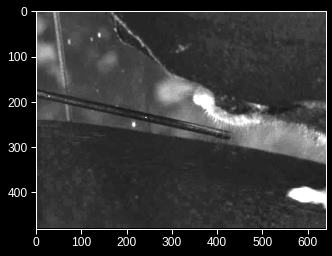

In [360]:
fig,ax=plt.subplots()
frame = behavior_movie.get_frame(time=1710)[:,:,0]
frame_n1 = behavior_movie.get_frame(time=1710-0.1)[:,:,0]
frame_p1 = behavior_movie.get_frame(time=1710+0.1)[:,:,0]
frame_n2 = behavior_movie.get_frame(time=1710-0.2)[:,:,0]
frame_p2 = behavior_movie.get_frame(time=1710+0.2)[:,:,0]
p99 = np.percentile(frame, 99)
ax.imshow(frame,clim=[0,p99],cmap='gray')

In [367]:
np.percentile(np.hstack((frame.flatten(),frame_n1.flatten(),frame_p1.flatten(),frame_n2.flatten(),frame_p2.flatten())),99)

73.0

In [286]:
np.shape(behavior_movie.get_frame(time=1710))

(480, 640, 3)

In [261]:
eye_movie.get_frame(time=1710)

AssertionError: sync timestamps do not exist

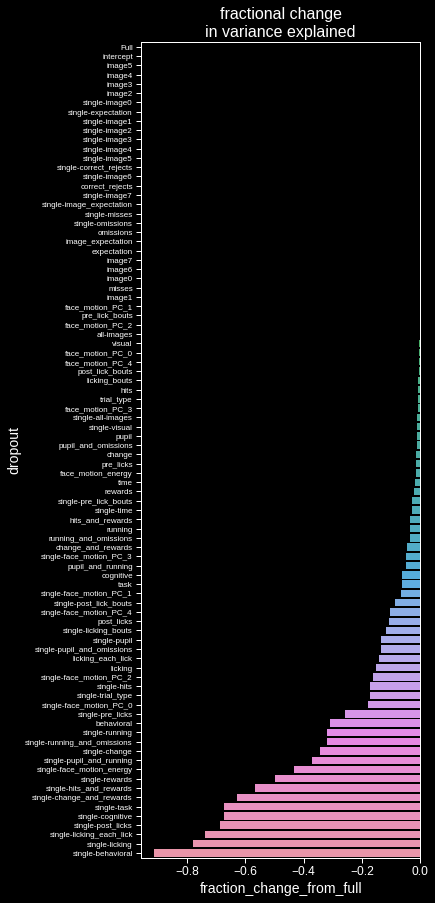

In [345]:
fig,ax=plt.subplots(figsize=(5,15))
gvt.plot_dropout_summary(self.results_summary, self.cell_specimen_id, ax)

In [346]:
self.results_summary

type,dropout,absolute_change_from_full,variance_explained,variance_explained_full,fraction_change_from_full,cell_specimen_id
0,Full,0.000000,0.008935,0.008935,0.000000,1022738347
1,all-images,-0.000383,0.008552,0.008935,-0.042877,1022738347
2,behavioral,-0.003169,0.005766,0.008935,-0.354685,1022738347
3,change,0.000199,0.009134,0.008935,0.000000,1022738347
4,change_and_rewards,0.000357,0.009292,0.008935,0.000000,1022738347
...,...,...,...,...,...,...
3867,single-visual,-0.093935,0.000700,0.094634,0.000000,1022739044
3868,task,-0.006172,0.088462,0.094634,-0.065220,1022739044
3869,time,0.000092,0.094726,0.094634,0.000000,1022739044
3870,trial_type,-0.000167,0.094467,0.094634,-0.001764,1022739044


In [386]:
data_to_plot = (
        self.results_summary
        .query('cell_specimen_id == @cell_specimen_id')
        .sort_values(by='fraction_change_from_full', ascending=False)
    ).copy().reset_index(drop=True)
data_to_plot

type,dropout,absolute_change_from_full,variance_explained,variance_explained_full,fraction_change_from_full,cell_specimen_id
0,Full,0.000000,0.665450,0.66545,0.000000,1022738497
1,intercept,0.000695,0.666145,0.66545,0.000000,1022738497
2,image5,0.000010,0.665460,0.66545,0.000000,1022738497
3,image4,0.000014,0.665465,0.66545,0.000000,1022738497
4,image3,0.000198,0.665648,0.66545,0.000000,1022738497
...,...,...,...,...,...,...
83,single-cognitive,-0.217265,0.448185,0.66545,-0.673507,1022738497
84,single-post_licks,-0.208417,0.457033,0.66545,-0.686802,1022738497
85,single-licking_each_lick,-0.173061,0.492390,0.66545,-0.739934,1022738497
86,single-licking,-0.146156,0.519294,0.66545,-0.780365,1022738497


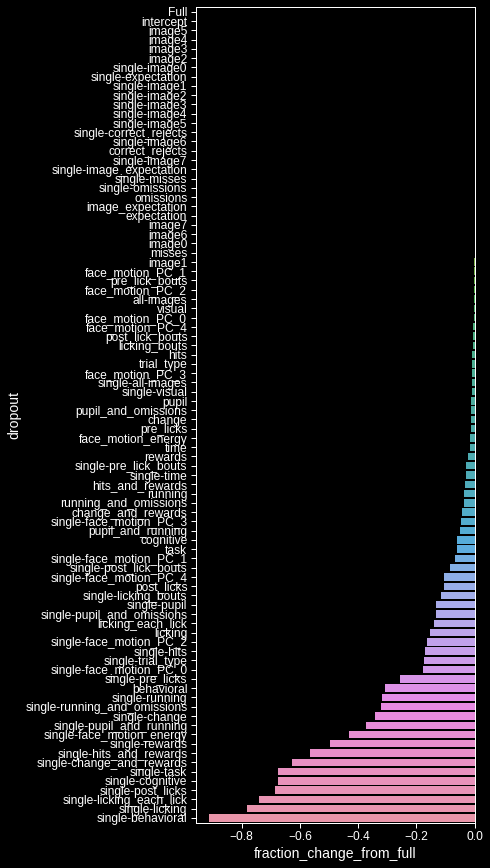

In [351]:
fig,ax=plt.subplots(figsize=(5,15))
sns.barplot(
    data = data_to_plot,
    x = 'fraction_change_from_full',
    y = 'dropout',
    ax=ax,
    # palette=palette
)

In [388]:
dropouts = data_to_plot.dropout.unique()
single_dropouts = [d for d in dropouts if d.startswith('single-')]
combined_dropouts = [d.split('single-')[1] for d in singles]

In [435]:
gat.generate_results_summary(self.glm)

,dropout,absolute_change_from_full,variance_explained,variance_explained_full,fraction_change_from_full,cell_specimen_id,adj_fraction_change_from_full,adj_variance_explained,adj_variance_explained_full
0,Full,0.000000,0.008935,0.008935,0.000000,1022738347,0.000000,0.008935,0.008935
1,all-images,-0.000383,0.008552,0.008935,-0.042877,1022738347,-0.037372,0.010430,0.010835
2,behavioral,-0.003169,0.005766,0.008935,-0.354685,1022738347,-0.353433,0.005776,0.008933
3,change,0.000199,0.009134,0.008935,0.000000,1022738347,0.000000,0.001981,0.001513
4,change_and_rewards,0.000357,0.009292,0.008935,0.000000,1022738347,0.000000,0.010251,0.009048
...,...,...,...,...,...,...,...,...,...
3867,single-visual,-0.093935,0.000700,0.094634,0.000000,1022739044,0.000000,0.000700,0.094634
3868,task,-0.006172,0.088462,0.094634,-0.065220,1022739044,-0.063397,0.151349,0.161594
3869,time,0.000092,0.094726,0.094634,0.000000,1022739044,0.000000,0.094726,0.094634
3870,trial_type,-0.000167,0.094467,0.094634,-0.001764,1022739044,0.000000,0.000000,0.000000


In [438]:
data_to_plot = (
    gat.generate_results_summary(self.glm)
    .query('cell_specimen_id == @cell_specimen_id')
    .sort_values(by='adj_fraction_change_from_full', ascending=False)
).copy().reset_index(drop=True)

dropouts = data_to_plot.dropout.unique()
single_dropouts = [d for d in dropouts if d.startswith('single-')]
combined_dropouts = [d.split('single-')[1] for d in single_dropouts]

for idx,row in data_to_plot.iterrows():
    if row['dropout'] in single_dropouts:
        data_to_plot.at[idx,'dropout_type']='single'
        data_to_plot.at[idx,'dropout_simple']=row['dropout'].split('single-')[1]
    elif row['dropout'] in combined_dropouts:
        data_to_plot.at[idx,'dropout_type']='combined'
        data_to_plot.at[idx,'dropout_simple']=row['dropout']

In [446]:
yorder = data_to_plot.query('dropout_type == "single"').sort_values(by='adj_fraction_change_from_full',ascending=False)['dropout_simple'].values
yorder

array(['image4', 'correct_rejects', 'misses', 'omissions',
       'post_lick_bouts', 'pre_lick_bouts', 'trial_type', 'licking_bouts',
       'visual', 'time', 'all-images', 'image_expectation',
       'face_motion_PC_2', 'image0', 'image1', 'image2', 'image3',
       'image5', 'image6', 'image7', 'expectation', 'pupil_and_omissions',
       'face_motion_PC_1', 'pupil', 'face_motion_PC_3',
       'face_motion_PC_0', 'pre_licks', 'change', 'post_licks',
       'licking_each_lick', 'licking', 'rewards', 'face_motion_PC_4',
       'hits_and_rewards', 'change_and_rewards', 'task', 'cognitive',
       'running_and_omissions', 'running', 'pupil_and_running',
       'face_motion_energy', 'behavioral', 'hits'], dtype=object)

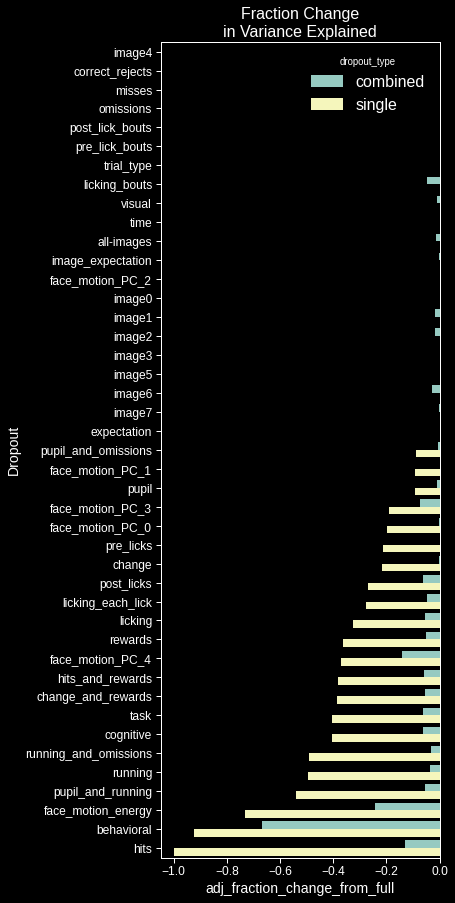

In [449]:
fig,ax=plt.subplots(figsize=(5,15))
gvt.plot_dropout_summary(gat.generate_results_summary(self.glm), cell_specimen_id, ax)

In [397]:
gat.generate_results_summary(self.glm).reset_index()

type,dropout,absolute_change_from_full,variance_explained,variance_explained_full,fraction_change_from_full,cell_specimen_id
0,Full,0.000000,0.008935,0.008935,0.000000,1022738347
1,all-images,-0.000383,0.008552,0.008935,-0.042877,1022738347
2,behavioral,-0.003169,0.005766,0.008935,-0.354685,1022738347
3,change,0.000199,0.009134,0.008935,0.000000,1022738347
4,change_and_rewards,0.000357,0.009292,0.008935,0.000000,1022738347
...,...,...,...,...,...,...
3867,single-visual,-0.093935,0.000700,0.094634,0.000000,1022739044
3868,task,-0.006172,0.088462,0.094634,-0.065220,1022739044
3869,time,0.000092,0.094726,0.094634,0.000000,1022739044
3870,trial_type,-0.000167,0.094467,0.094634,-0.001764,1022739044


In [401]:
glm.results.loc[1022739044]['task__avg_cv_adjvar_test']

0.15134909752915315

In [403]:
test_cols = [col for col in glm.results.columns if ((not col.endswith('train'))&('adj' in col))]
test_cols

['Full__avg_cv_adjvar_test',
 'Full__avg_cv_adjvar_test_full_comparison',
 'Full__adj_dropout',
 'intercept__avg_cv_adjvar_test',
 'intercept__avg_cv_adjvar_test_full_comparison',
 'intercept__adj_dropout',
 'time__avg_cv_adjvar_test',
 'time__avg_cv_adjvar_test_full_comparison',
 'time__adj_dropout',
 'pre_licks__avg_cv_adjvar_test',
 'pre_licks__avg_cv_adjvar_test_full_comparison',
 'pre_licks__adj_dropout',
 'post_licks__avg_cv_adjvar_test',
 'post_licks__avg_cv_adjvar_test_full_comparison',
 'post_licks__adj_dropout',
 'pre_lick_bouts__avg_cv_adjvar_test',
 'pre_lick_bouts__avg_cv_adjvar_test_full_comparison',
 'pre_lick_bouts__adj_dropout',
 'post_lick_bouts__avg_cv_adjvar_test',
 'post_lick_bouts__avg_cv_adjvar_test_full_comparison',
 'post_lick_bouts__adj_dropout',
 'rewards__avg_cv_adjvar_test',
 'rewards__avg_cv_adjvar_test_full_comparison',
 'rewards__adj_dropout',
 'change__avg_cv_adjvar_test',
 'change__avg_cv_adjvar_test_full_comparison',
 'change__adj_dropout',
 'hits__av

In [415]:
cell_specimen_id = 1022739044
results_summary = pd.DataFrame(glm.results.loc[cell_specimen_id][test_cols]).reset_index().rename(columns={cell_specimen_id:'variance_explained','index':'dropout_name'})


for idx,row in results_summary.iterrows():
    results_summary.at[idx,'dropout'] = row['dropout_name'].split('__')[0]
    results_summary.at[idx,'type'] = row['dropout_name'].split('__')[1]

results_summary

,dropout_name,variance_explained,dropout,type
0,Full__avg_cv_adjvar_test,0.094634,Full,avg_cv_adjvar_test
1,Full__avg_cv_adjvar_test_full_comparison,0.094634,Full,avg_cv_adjvar_test_full_comparison
2,Full__adj_dropout,-0.000000,Full,adj_dropout
3,intercept__avg_cv_adjvar_test,0.094186,intercept,avg_cv_adjvar_test
4,intercept__avg_cv_adjvar_test_full_comparison,0.094634,intercept,avg_cv_adjvar_test_full_comparison
...,...,...,...,...
259,single-expectation__avg_cv_adjvar_test_full_co...,0.094680,single-expectation,avg_cv_adjvar_test_full_comparison
260,single-expectation__adj_dropout,0.000000,single-expectation,adj_dropout
261,single-cognitive__avg_cv_adjvar_test,0.065473,single-cognitive,avg_cv_adjvar_test
262,single-cognitive__avg_cv_adjvar_test_full_comp...,0.161594,single-cognitive,avg_cv_adjvar_test_full_comparison


In [416]:
results_summary = pd.pivot_table(results_summary.drop(columns=['dropout_name']), index=['dropout'],columns=['type'],values =['variance_explained'])
results_summary.columns = results_summary.columns.droplevel()
results_summary = results_summary.rename(columns={
    'avg_cv_adjvar_test': 'adj_variance_explained',
    'avg_cv_adjvar_test_full_comparison': 'adj_variance_explained_full',
    'adj_dropout': 'adj_fraction_change_from_full'
})
results_summary

type,adj_fraction_change_from_full,adj_variance_explained,adj_variance_explained_full
dropout,,,
Full,0.000000,0.094634,0.094634
all-images,-0.013321,0.097219,0.098532
behavioral,-0.668062,0.031427,0.094678
change,-0.001711,0.127210,0.127428
change_and_rewards,-0.053790,0.175499,0.185476
...,...,...,...
single-visual,0.000000,0.000700,0.094634
task,-0.063397,0.151349,0.161594
time,0.000000,0.094726,0.094634


In [428]:
results_summary = gat.generate_results_summary(self.glm)
results_summary

,absolute_change_from_full,variance_explained,variance_explained_full,fraction_change_from_full,cell_specimen_id,adj_fraction_change_from_full,adj_variance_explained,adj_variance_explained_full
0,0.000000,0.008935,0.008935,0.000000,1022738347,0.000000,0.008935,0.008935
1,-0.000383,0.008552,0.008935,-0.042877,1022738347,-0.037372,0.010430,0.010835
2,-0.003169,0.005766,0.008935,-0.354685,1022738347,-0.353433,0.005776,0.008933
3,0.000199,0.009134,0.008935,0.000000,1022738347,0.000000,0.001981,0.001513
4,0.000357,0.009292,0.008935,0.000000,1022738347,0.000000,0.010251,0.009048
...,...,...,...,...,...,...,...,...
3867,-0.093935,0.000700,0.094634,0.000000,1022739044,0.000000,0.000700,0.094634
3868,-0.006172,0.088462,0.094634,-0.065220,1022739044,-0.063397,0.151349,0.161594
3869,0.000092,0.094726,0.094634,0.000000,1022739044,0.000000,0.094726,0.094634
3870,-0.000167,0.094467,0.094634,-0.001764,1022739044,0.000000,0.000000,0.000000


In [422]:
gat.retrieve_results(search_dict={
    'glm_version':version,
    'cell_specimen_id':cell_specimen_id
},results_type='summary')

,_id,dropout,absolute_change_from_full,variance_explained,variance_explained_full,fraction_change_from_full,cell_specimen_id,adj_fraction_change_from_full,adj_variance_explained,adj_variance_explained_full,...,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number
0,5f6eb70e3252752bf8f8e1d7,Full,0.000000,0.094634,0.094634,0.000000,1022739044,0.000000,0.094634,0.094634,...,NaN,929817917,Slc17a7-IRES2-Cre,NaN,NaN,1,False,Slc17a7_VISam_182,False,5
1,5f6eb70e3252752bf8f8e1d8,all-images,-0.001194,0.093441,0.094634,-0.012616,1022739044,-0.013321,0.097219,0.098532,...,NaN,929817917,Slc17a7-IRES2-Cre,NaN,NaN,1,False,Slc17a7_VISam_182,False,5
2,5f6eb70e3252752bf8f8e1d9,behavioral,-0.063200,0.031434,0.094634,-0.667833,1022739044,-0.668062,0.031427,0.094678,...,NaN,929817917,Slc17a7-IRES2-Cre,NaN,NaN,1,False,Slc17a7_VISam_182,False,5
3,5f6eb70e3252752bf8f8e1da,change,-0.000101,0.094533,0.094634,-0.001070,1022739044,-0.001711,0.127210,0.127428,...,NaN,929817917,Slc17a7-IRES2-Cre,NaN,NaN,1,False,Slc17a7_VISam_182,False,5
4,5f6eb70e3252752bf8f8e1db,change_and_rewards,-0.005560,0.089074,0.094634,-0.058752,1022739044,-0.053790,0.175499,0.185476,...,NaN,929817917,Slc17a7-IRES2-Cre,NaN,NaN,1,False,Slc17a7_VISam_182,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,5f6eb70e3252752bf8f8e22a,single-visual,-0.093935,0.000700,0.094634,0.000000,1022739044,0.000000,0.000700,0.094634,...,NaN,929817917,Slc17a7-IRES2-Cre,NaN,NaN,1,False,Slc17a7_VISam_182,False,5
84,5f6eb70e3252752bf8f8e22b,task,-0.006172,0.088462,0.094634,-0.065220,1022739044,-0.063397,0.151349,0.161594,...,NaN,929817917,Slc17a7-IRES2-Cre,NaN,NaN,1,False,Slc17a7_VISam_182,False,5
85,5f6eb70e3252752bf8f8e22c,time,0.000092,0.094726,0.094634,0.000000,1022739044,0.000000,0.094726,0.094634,...,NaN,929817917,Slc17a7-IRES2-Cre,NaN,NaN,1,False,Slc17a7_VISam_182,False,5
86,5f6eb70e3252752bf8f8e22d,trial_type,-0.000167,0.094467,0.094634,-0.001764,1022739044,0.000000,0.000000,0.000000,...,NaN,929817917,Slc17a7-IRES2-Cre,NaN,NaN,1,False,Slc17a7_VISam_182,False,5


In [32]:
import visual_behavior_glm.GLM_params as glm_params
import os

In [33]:
glm_version = '7_L2_optimize_by_session'
params = glm_params.load_run_json(glm_version)
os.path.join(params['output_dir'],'figures')

'/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/v_7_L2_optimize_by_session/figures'